In [75]:
import pandas as pd
from keybert import KeyBERT
from tqdm import tqdm

tqdm.pandas()

In [76]:
df = pd.read_csv('../../../data/telegram/messages_scraped_english.csv').sample(10_000)

/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_65224/4294944815.py:1: DtypeWarning: Columns (22,25,26,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../data/telegram/messages_scraped_english.csv').sample(10_000)


In [77]:
model = KeyBERT('all-MiniLM-L6-v2')
topics = []
df['keywords'] = df.messageText.progress_apply(lambda x: model.extract_keywords(x, keyphrase_ngram_range=(1, 2)))

100%|██████████| 10000/10000 [10:39<00:00, 15.63it/s] 


In [78]:
df = df.explode('keywords')
df

,chat,id,peer_id,messageDatetime,messageDate,messageText,out,mentioned,media_unread,silent,...,restriction_reason,ttl_period,quick_reply_shortcut_id,effect,factcheck,views,forwards,replies,reactions,keywords
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...","(russians killed, 0.6739)"
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...","(500 russians, 0.6733)"
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...","(russians, 0.4421)"
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...","(nearly 500, 0.3608)"
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...","(killed week, 0.3463)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...","(cardboard drones, 0.6159)"
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...","(drones used, 0.5896)"
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...","(drones, 0.5347)"
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...","(military airfield, 0.4452)"


In [79]:
df = df[~df.keywords.isna()]

In [80]:
df['score'] = df.keywords.progress_apply(lambda x: x[1])
df['keywords'] = df.keywords.progress_apply(lambda x: x[0])
df

100%|██████████| 49514/49514 [00:00<00:00, 2662898.21it/s]
/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_65224/2896029163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df.keywords.progress_apply(lambda x: x[1])
100%|██████████| 49514/49514 [00:00<00:00, 2844965.18it/s]
/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_65224/2896029163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df.keywords.progress_apply(lambda x: x[0])


,chat,id,peer_id,messageDatetime,messageDate,messageText,out,mentioned,media_unread,silent,...,ttl_period,quick_reply_shortcut_id,effect,factcheck,views,forwards,replies,reactions,keywords,score
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",russians killed,0.6739
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",500 russians,0.6733
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",russians,0.4421
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",nearly 500,0.3608
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",killed week,0.3463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...",cardboard drones,0.6159
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...",drones used,0.5896
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...",drones,0.5347
37199,https://t.me/pilotblog,6345,1175848329,2023-08-27 16:46:33+00:00,2023-08-27,Ruzzia reports that the carton / cardboard dro...,False,False,False,False,...,NaN,NaN,NaN,NaN,117346,31,0,"{'🤣': 3521, '👍': 723, '😁': 184, '🤡': 146, '❤':...",military airfield,0.4452


<Axes: >

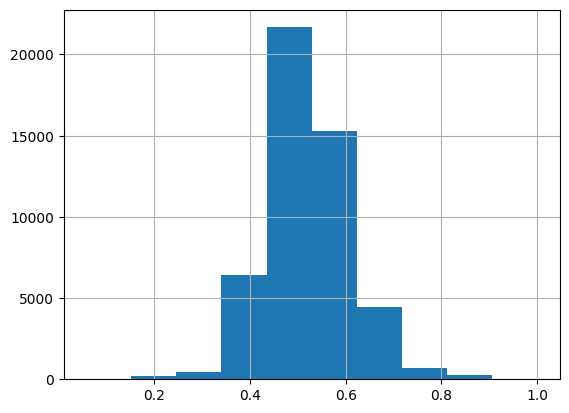

In [81]:
df.score.hist()

In [82]:
df = df[df.score > 0.6]
df

,chat,id,peer_id,messageDatetime,messageDate,messageText,out,mentioned,media_unread,silent,...,ttl_period,quick_reply_shortcut_id,effect,factcheck,views,forwards,replies,reactions,keywords,score
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",russians killed,0.6739
236173,https://t.me/WorldNews,44385,1252754045,2023-01-29 16:53:15+00:00,2023-01-29,"Nearly 5,500 Russians killed last week in war:...",False,False,False,False,...,NaN,NaN,NaN,NaN,2123,1,0,"{'👍': 14, '😢': 7, '❤': 4, '💩': 4, '👎': 1, '😁':...",500 russians,0.6733
428309,https://t.me/WesternJournal,7759,1462978404,2021-11-03 01:58:17+00:00,2021-11-03,Shaq Tells His Kids the Harsh Truth About His ...,False,False,False,True,...,NaN,NaN,NaN,NaN,13268,10,0,{},shaq tells,0.6325
323632,https://t.me/NewsmaxTV,9973,1361496098,2024-07-01 11:21:16+00:00,2024-07-01,We had the greatest economy in history: Trump ...,False,False,False,False,...,NaN,NaN,NaN,NaN,3699,6,0,"{'👍': 97, '👎': 1}",greatest economy,0.6668
603782,https://t.me/SGTnewsNetwork,64599,1422038988,2024-04-19 02:15:00+00:00,2024-04-19,Black voters in Chicago are sick of Democrats:...,False,False,False,False,...,NaN,NaN,NaN,NaN,10443,56,15,"{'👍': 209, '🔥': 51, '❤': 28, '🤣': 12, '💯': 8, ...",voters chicago,0.6480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745659,https://t.me/NTDNews,41784,1343572701,2022-05-25 14:58:32+00:00,2022-05-25,"In this episode of #TruthOverNews, we discuss ...",False,False,False,False,...,NaN,NaN,NaN,NaN,1398,1,0,"{'👍': 9, '❤': 1}",dc jury,0.6504
745659,https://t.me/NTDNews,41784,1343572701,2022-05-25 14:58:32+00:00,2022-05-25,"In this episode of #TruthOverNews, we discuss ...",False,False,False,False,...,NaN,NaN,NaN,NaN,1398,1,0,"{'👍': 9, '❤': 1}",baker testimony,0.6017
384599,https://t.me/WarMonitors,22677,1625429257,2024-04-19 03:26:39+00:00,2024-04-19,⚡#BREAKING Iranian official to reuters: There ...,False,False,False,False,...,NaN,NaN,NaN,NaN,17576,34,0,"{'👍': 125, '❤': 15, '😐': 9, '🙏': 5, '🤬': 4, '💔...",iran reuters,0.7064
384599,https://t.me/WarMonitors,22677,1625429257,2024-04-19 03:26:39+00:00,2024-04-19,⚡#BREAKING Iranian official to reuters: There ...,False,False,False,False,...,NaN,NaN,NaN,NaN,17576,34,0,"{'👍': 125, '❤': 15, '😐': 9, '🙏': 5, '🤬': 4, '💔...",reuters missile,0.6544


In [83]:
from sentence_transformers import SentenceTransformer
import numpy as np

model1 = SentenceTransformer("all-MiniLM-L6-v2")
df['embeddings'] = df.keywords.progress_apply(lambda x: model1.encode(x, normalize_embeddings=True))

100%|██████████| 7915/7915 [00:54<00:00, 145.98it/s]
/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_65224/1705578395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = df.keywords.progress_apply(lambda x: model1.encode(x, normalize_embeddings=True))


In [ ]:
texts = list(df.keywords.values)
embeddings = list(df.embeddings.values)
topics = list(zip(texts, embeddings))
clusters = {}
for t1, t1_emb in tqdm(topics, total=len(texts)):
    clusters[f'{t1}'] = []
    for t2, t2_emb in topics:
        if t1 != t2:
            sim = max(np.array(model1.similarity(t1_emb, t2_emb))).tolist()[0]
            if sim > 0.6:
                clusters[f'{t1}'].append(t2)

 82%|████████▏ | 6475/7915 [14:58<03:19,  7.20it/s]

In [85]:
clusters

{'russians killed': [],
 '500 russians': [],
 'shaq tells': [],
 'greatest economy': [],
 'voters chicago': [],
 'black voters': [],
 'wounded drone': [],
 'prices crude': [],
 'union address': [],
 'commander chief': [],
 'conservative conference': [],
 'insane cirillo': [],
 'afghanistan withdrawal': [],
 'botched afghanistan': [],
 'presidential debate': [],
 'enjoy': [],
 'chinese regime': [],
 'hospital dnipro': [],
 'sgtnewsnetwork twitter': [],
 'ukrainian refugees': [],
 'refugees': [],
 'sebastian gorka': [],
 'peruvian communist': [],
 'leader peruvian': [],
 'exploding maple': [],
 'maple trees': [],
 'openai disruptive': [],
 'trump vatican': [],
 'cena apology': [],
 'cenas apology': [],
 'shen yun': [],
 'invade taiwan': ['taiwan invasion'],
 'taiwan 2027': [],
 'barbecuing fish': [],
 'dropped humanitarian': [],
 'planes dropped': [],
 'represent taiwan': [],
 'taiwan president': [],
 'banner tiananmen': [],
 'courageous falun': [],
 'envoys xinjiang': [],
 'xinjiang row

In [ ]:
from bertopic import BERTopic
from bertopic.representation import TextGeneration
from transformers import pipeline
from umap import UMAP

prompt = """
Please note that the following messages are likely related to the Ukraine-Russia conflict.
 
I have a topic described by these keywords:
[KEYWORDS]
 
Based on this information, please provide a concise and highly specific label that best represents this topic.
"""

generator = pipeline('text2text-generation', model='google/flan-t5-base')
representation_model = TextGeneration(generator, prompt=prompt)
sentence_model = SentenceTransformer('sentence-t5-base')
embeddings = sentence_model.encode(texts)
topic_model = BERTopic(representation_model=representation_model, embedding_model=sentence_model).fit(docs, embeddings)
topic_model.visualize_documents(texts, embeddings=embeddings)
reduced_embeddings = UMAP(n_components=2, metric='cosine').fit_transform(embeddings)
fig = topic_model.visualize_documents(texts, reduced_embeddings=reduced_embeddings)
fig.write_html(f'test.html')